In [1]:
#Fatma Betul Seker
#Lab 5 - Area Under a Curve
#17 Feb 2022

import numpy as np
import math as ma
from scipy import integrate
import matplotlib as mpl
import matplotlib.pyplot as plt

## Question:

Find the area under 3 curves, over the interval x = -5.0 to 5.0:

• Straight line: y1 = -0.5 x + 4.0

• Parabola: y2 = -0.29 x2 - x + 12.5

• More Complicated function: y3 = 1.0 + 10(x + 1.0)exp(-x2)

In [2]:
#Defining Functions

def f1(x):
    return -0.5*x + 4.0

def f2(x):
    return -0.29*(x**2)-x+12.5

def f3(x):
    return 1.0 + 10*(x+1.0)*(ma.e ** (-x**2))

In [3]:
#Midpoints of the rectangles
a=0.0005
mid_points= np.arange(-5.0,5.0,2*a)+a

#Heights of the rectangles

y1 = f1(mid_points)
y2 = f2(mid_points)
y3 = f3(mid_points)

#Areas of the rectangles

total1 = np.sum(y1*(2*a))
print(total1)
total2 = np.sum(y2*(2*a))
print(total2)
total3 = np.sum(y3*(2*a))
print(total3)

39.99999999999165
100.83333357496716
27.72453850902199


In [4]:
#Scipy quad. areas
quad1 = integrate.quadrature(f1, -5.0, 5.0)[0]
print(quad1)
quad2 = integrate.quadrature(f2, -5.0, 5.0)[0]
print(quad2)
quad3 = integrate.quadrature(f3, -5.0, 5.0)[0]
print(quad3)

40.0
100.8333333333333
27.72453844220361


In [5]:
#Percent differences

def per_dif(mine, quad):
    return 200*abs(mine - quad)/(mine + quad)
    
print(per_dif(total1, quad1))
print(per_dif(total2, quad2))
print(per_dif(total3, quad3))

2.0872192862955124e-11
2.3963688173120205e-07
2.410080882716178e-07


In [16]:
#Total areas for varying step sizes

b=0.000001

coefficients = np.arange(1,100001,500)

dx_array = b*coefficients

areas1 = []
areas2 = []
areas3 = []

for ss in dx_array:
    mid_points= np.arange(-5.0,5.0,ss)+ss/2
    y1 = f1(mid_points)
    y2 = f2(mid_points)
    y3 = f3(mid_points)
    total1 = np.sum(y1*ss)
    areas1.append(total1)
    total2 = np.sum(y2*ss)
    areas2.append(total2)
    total3 = np.sum(y3*ss)
    areas3.append(total3)

In [17]:
#Percent Differences for varying step sizes
per_difs1 = per_dif(areas1, quad1)
per_difs2 = per_dif(areas2, quad2)
per_difs3 = per_dif(areas3, quad3)

# ## Percent Diffences vs. step sizes for the functions


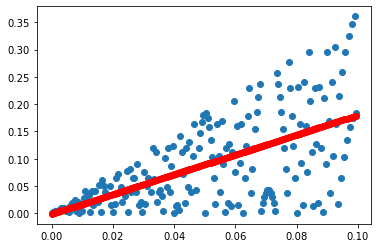

In [26]:
plt.scatter(dx_array, per_difs1)

#Adding trendline-------------------------------------------
z = np.polyfit(dx_array, per_difs1, 1)
p = np.poly1d(z)
plt.plot(dx_array, p(dx_array), "r-o")
#Credit: tutorialspoint.com/how-can-i-draw-a-scatter-trend-line-using-matplotlib

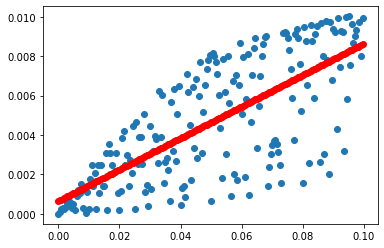

In [27]:
plt.scatter(dx_array, per_difs2)
z = np.polyfit(dx_array, per_difs2, 1)
p = np.poly1d(z)
plt.plot(dx_array, p(dx_array), "r-o")
#Obviously not linear but anyway

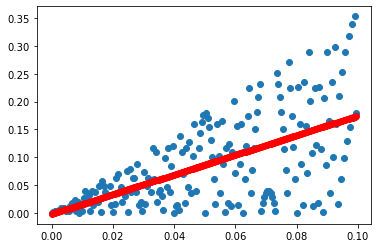

In [28]:
plt.scatter(dx_array, per_difs3)
z = np.polyfit(dx_array, per_difs3, 1)
p = np.poly1d(z)
plt.plot(dx_array, p(dx_array), "r-o")